In [488]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model, svm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from fbprophet import Prophet
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
from sklearn.model_selection import train_test_split

In [410]:
df=pd.read_csv("PSZ_day.csv", delim_whitespace=True)
for i in range(0, len(df.CH2O)-15,35):
    s=0
    k=0
    for j in range(i,i+35):
        if(df.TSP[j]>0):
            s+=df.TSP[j]
            k+=1        
    df.TSP[i:i+35]=df.TSP[i:i+35].fillna(s/k)        
df.TSP[3780:3795]=df.TSP[3780:3795].fillna(0.5)
df=df.fillna(0)
df

/Users/Markos/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/Markos/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [426]:
df1=df.ix[df.nazva == "ПСЗ-1"]
df2=df.ix[df.nazva == "ПСЗ-2"]
df3=df.ix[df.nazva == "ПСЗ-3"]
df6=df.ix[df.nazva == "ПСЗ-6"]
df7=df.ix[df.nazva == "ПСЗ-7"]
df

,date,nazva,TSP,SO2,CO,NO2,NO,H2S,C6H6O,NH3,CH2O
0,2014-01-02,ПСЗ-1,0.978571,0.014,2,0.025,0.000,0.0020,0.0023,0.033,0.0070
1,2014-01-02,ПСЗ-2,0.978571,0.014,2,0.025,0.000,0.0023,0.0027,0.043,0.0065
2,2014-01-02,ПСЗ-3,0.978571,0.007,1,0.020,0.005,0.0037,0.0013,0.017,0.0035
3,2014-01-02,ПСЗ-6,1.000000,0.015,2,0.025,0.000,0.0003,0.0010,0.023,0.0060
4,2014-01-02,ПСЗ-7,0.978571,0.012,2,0.015,0.000,0.0023,0.0017,0.040,0.0110
5,2014-01-03,ПСЗ-1,0.978571,0.024,3,0.060,0.000,0.0030,0.0042,0.050,0.0090
6,2014-01-03,ПСЗ-2,0.978571,0.031,2,0.075,0.000,0.0030,0.0030,0.065,0.0060
7,2014-01-03,ПСЗ-3,0.978571,0.034,4,0.107,0.067,0.0050,0.0050,0.050,0.0110
8,2014-01-03,ПСЗ-6,1.250000,0.020,2,0.067,0.000,0.0015,0.0012,0.038,0.0035
9,2014-01-03,ПСЗ-7,0.978571,0.013,2,0.037,0.000,0.0015,0.0020,0.025,0.0035


In [414]:
df1

,date,nazva,TSP,SO2,CO,NO2,NO,H2S,C6H6O,NH3,CH2O
0,2014-01-02,ПСЗ-1,0.978571,0.014,2,0.025,0.0,0.0020,0.0023,0.033,0.0070
5,2014-01-03,ПСЗ-1,0.978571,0.024,3,0.060,0.0,0.0030,0.0042,0.050,0.0090
10,2014-01-04,ПСЗ-1,0.978571,0.023,2,0.025,0.0,0.0015,0.0030,0.042,0.0085
15,2014-01-06,ПСЗ-1,0.978571,0.027,2,0.070,0.0,0.0020,0.0020,0.040,0.0090
20,2014-01-08,ПСЗ-1,0.978571,0.012,2,0.040,0.0,0.0017,0.0017,0.033,0.0080
25,2014-01-09,ПСЗ-1,0.978571,0.010,2,0.050,0.0,0.0002,0.0002,0.022,0.0040
30,2014-01-10,ПСЗ-1,0.978571,0.008,2,0.060,0.0,0.0018,0.0025,0.035,0.0040
35,2014-01-11,ПСЗ-1,0.435714,0.016,2,0.025,0.0,0.0008,0.0002,0.028,0.0055
40,2014-01-13,ПСЗ-1,0.435714,0.025,2,0.035,0.0,0.0003,0.0007,0.013,0.0020
45,2014-01-14,ПСЗ-1,0.435714,0.031,2,0.070,0.0,0.0010,0.0008,0.022,0.0070


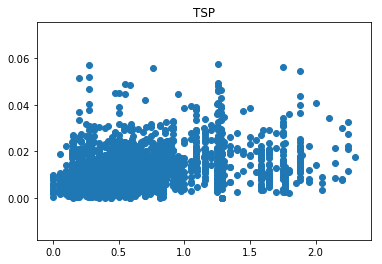

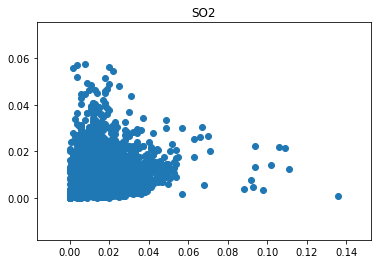

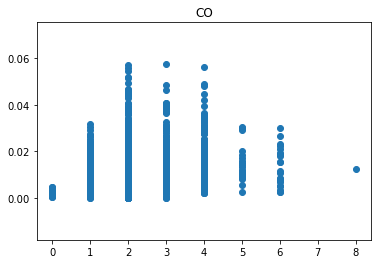

In [428]:

plt.figure(1)
plt.scatter(df.TSP, df.CH2O)
plt.title('TSP')

plt.figure(2)
plt.scatter(df.SO2, df.CH2O)
plt.title('SO2')

plt.figure(3)
plt.scatter(df.CO, df.CH2O)
plt.title('CO')
plt.show()

In [517]:
weather_TSP=df.TSP.values
weather_TSP = np.array(weather_TSP[:,np.newaxis])
weather_SO2=df.SO2.values
weather_SO2 = np.array(weather_SO2[:,np.newaxis])
weather_CO=df.CO.values
weather_CO = np.array(weather_CO[:,np.newaxis])
weather_NO2=df.NO2.values
weather_NO2 = np.array(weather_NO2[:,np.newaxis])
weather_NO=df.NO.values
weather_NO = np.array(weather_NO[:,np.newaxis])
weather_H2S=df.H2S.values
weather_H2S = np.array(weather_H2S[:,np.newaxis])
weather_C6H6O=df.C6H6O.values
weather_C6H6O = np.array(weather_C6H6O[:,np.newaxis])
weather_NH3=df.NH3.values
weather_NH3 = np.array(weather_NH3[:,np.newaxis])
weather_CH2O=df.CH2O.values
weather=np.hstack((weather_TSP,weather_SO2))
weather=np.hstack((weather,weather_CO))
weather=np.hstack((weather,weather_NO2))
weather=np.hstack((weather,weather_NO))
weather=np.hstack((weather,weather_H2S))
weather=np.hstack((weather,weather_C6H6O))
weather=np.hstack((weather,weather_NH3))

l=2670
weather.shape

(3794, 8)

In [500]:
#TSP
weather_X_train = np.array(weather_TSP[0:l,np.newaxis])
weather_Y_train=np.array(weather_CH2O[0:l,np.newaxis])
weather_X_test = np.array(weather_TSP[l:3790,np.newaxis])
weather_Y_test=np.array(weather_CH2O[l:3790,np.newaxis])
poly = PolynomialFeatures(degree=20)
reg = linear_model.Ridge (alpha = .5)
reg.fit (poly.fit_transform(weather_X_train),weather_Y_train)
print("Mean squared error:",sklearn.metrics.mean_squared_error(reg.predict(poly.fit_transform(weather_X_test)),weather_Y_test))
print('Variance score: ', reg.score(poly.fit_transform(weather_X_test), weather_Y_test))
print("error", np.sum(reg.predict(poly.fit_transform(weather_X_test)) - weather_Y_test))

test=np.linspace(0 , 2.3, 50)
test=test[:,np.newaxis]
plt.figure(figsize=(10,7),dpi=200)#Дані задані явно - функцію прогнав через відрізок
plt.scatter(weather_X_test, weather_Y_test,  color='black')
plt.plot(test, reg.predict(poly.fit_transform(test)), color='blue',
         linewidth=3)
plt.title('Пил')
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

Mean squared error: 4.54399646533e-05
Variance score:  -0.14084408855
sum error 2.67565375655


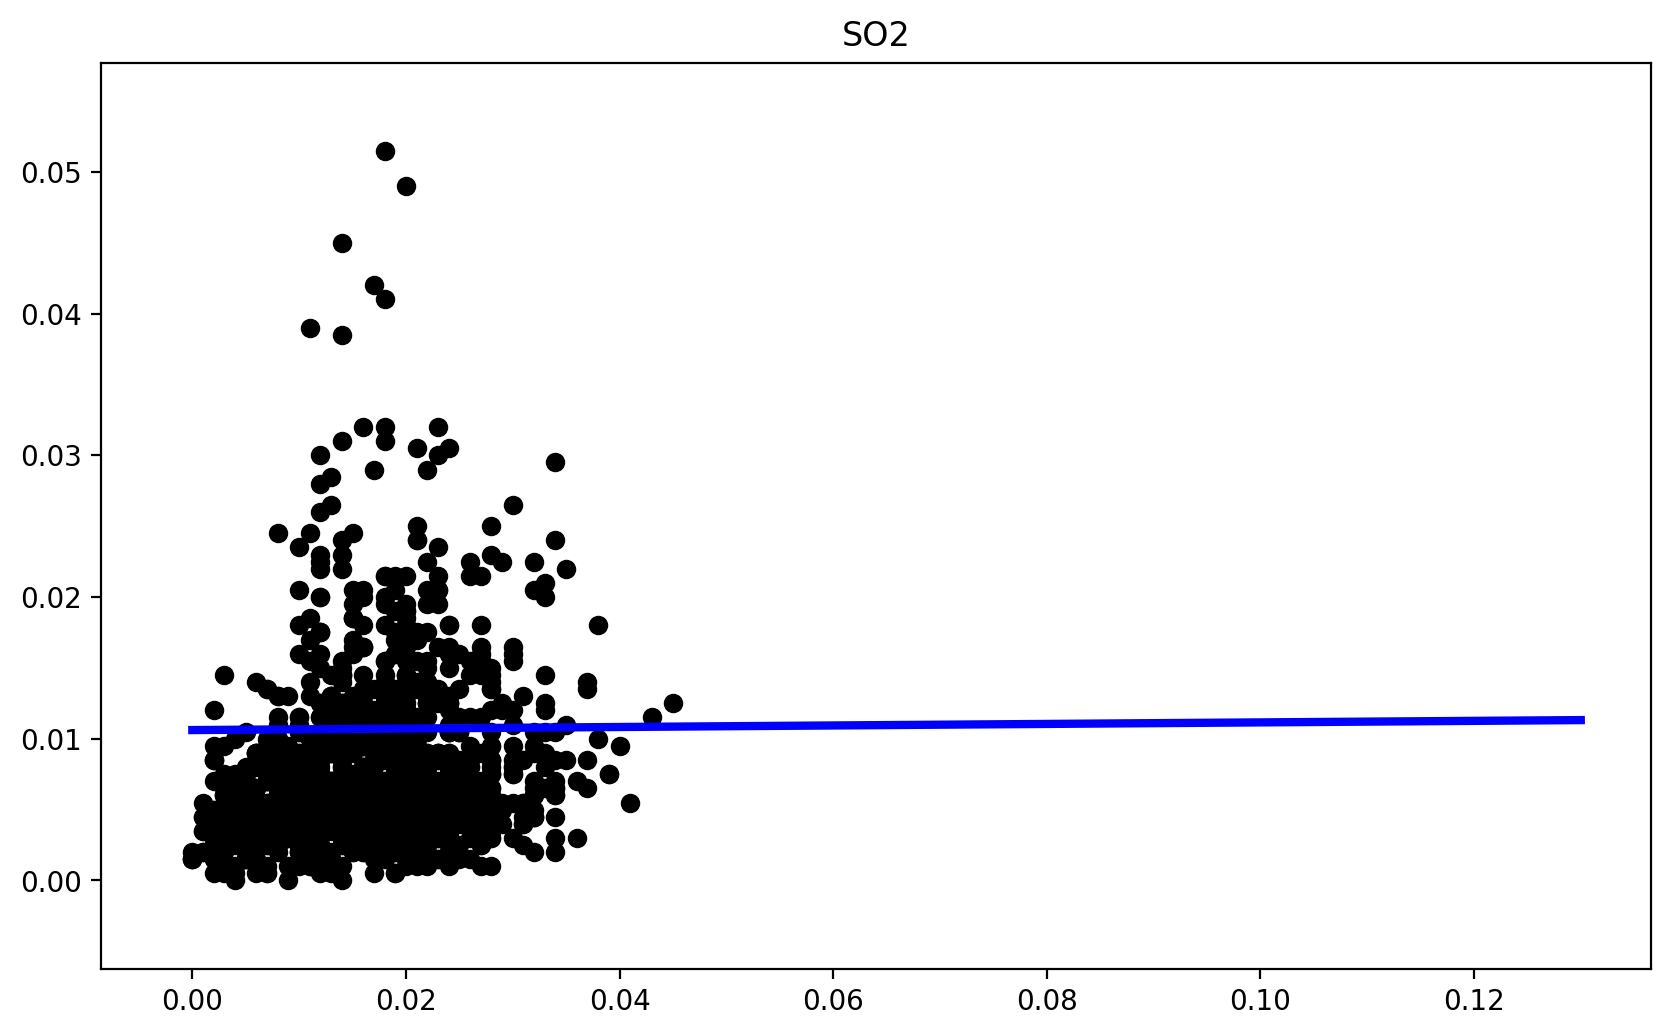

In [381]:
#SO2
weather_X_train = np.array(weather_SO2[0:l,np.newaxis])
weather_Y_train=np.array(weather_CH2O[0:l,np.newaxis])
weather_X_test = np.array(weather_SO2[l:3790,np.newaxis])
weather_Y_test=np.array(weather_CH2O[l:3790,np.newaxis])
poly = PolynomialFeatures(degree=1)
reg = linear_model.Ridge (alpha = 0.5)
reg.fit (poly.fit_transform(weather_X_train),weather_Y_train)
print("Mean squared error:",sklearn.metrics.mean_squared_error(reg.predict(poly.fit_transform(weather_X_test)),weather_Y_test))
print('Variance score: ', reg.score(poly.fit_transform(weather_X_test), weather_Y_test))
print("sum error", np.sum(reg.predict(poly.fit_transform(weather_X_test)) - weather_Y_test))

test=np.linspace(0 , 0.13, 50)
test=test[:,np.newaxis]
plt.figure(figsize=(10,6),dpi=200)
plt.scatter(weather_X_test, weather_Y_test,  color='black')
plt.plot(test, reg.predict(poly.fit_transform(test)), color='blue',
         linewidth=3)
plt.title('SO2')
plt.show()

Mean squared error: 4.74679317502e-05
Variance score:  -0.191759495107
sum error 2.85146466296


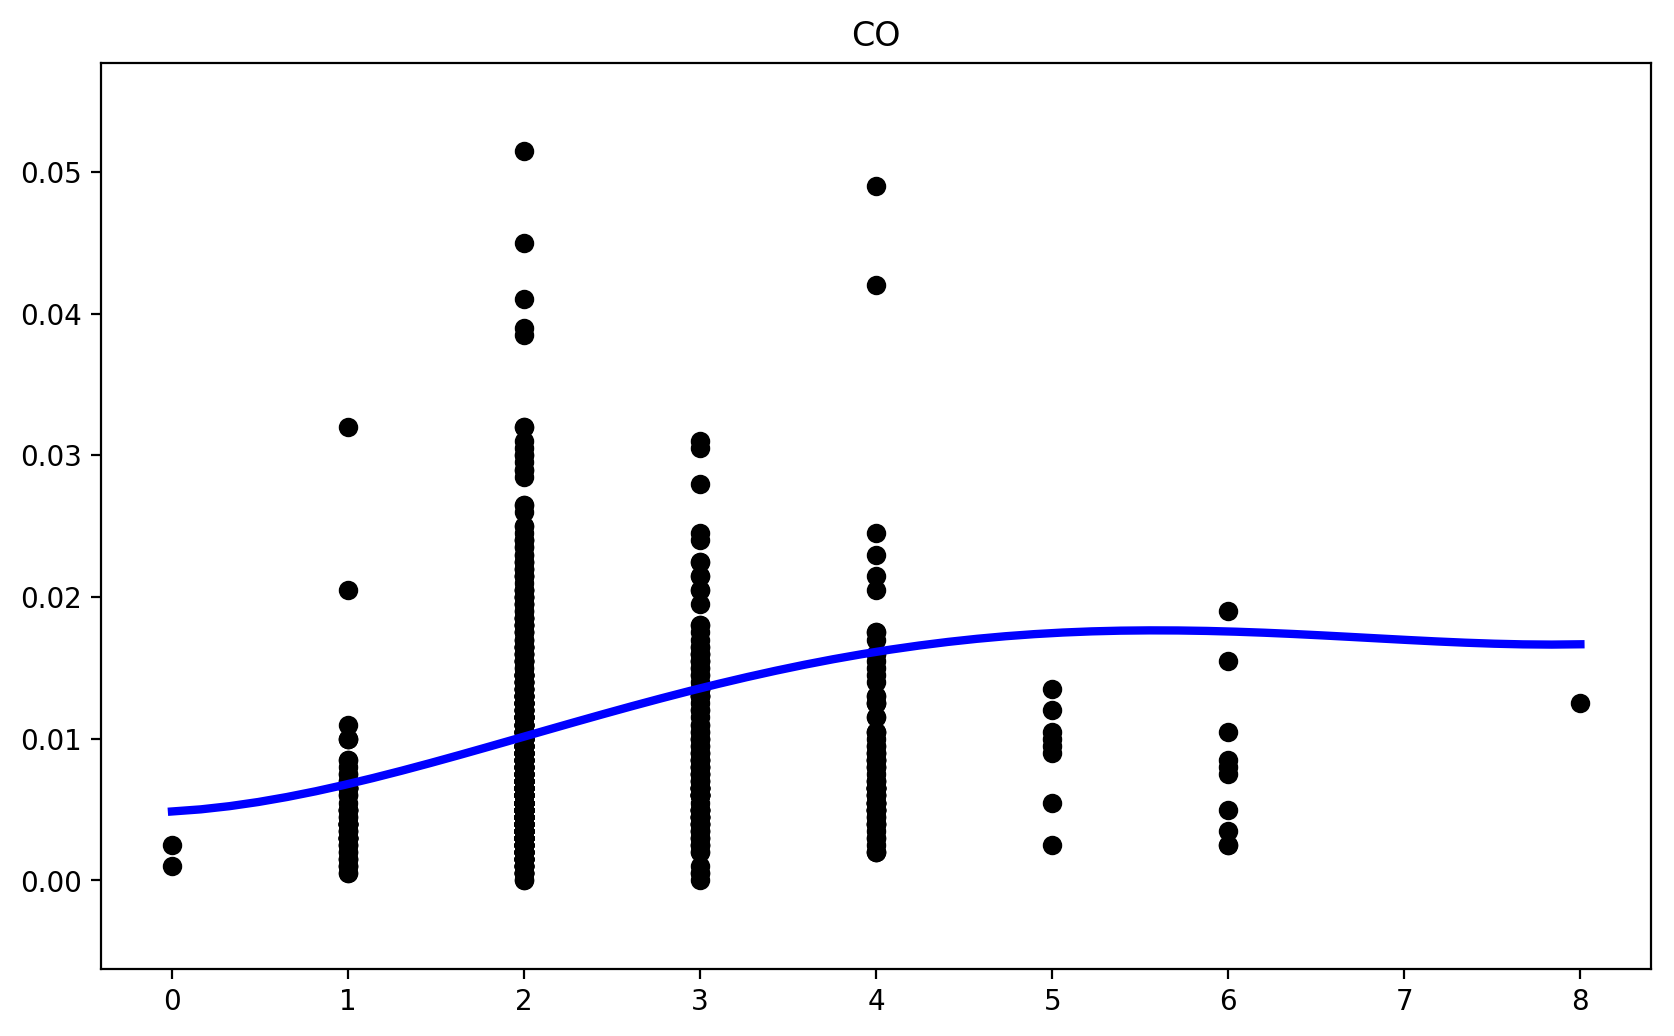

In [382]:
#CO
weather_X_train = np.array(weather_CO[0:l,np.newaxis])
weather_Y_train=np.array(weather_CH2O[0:l,np.newaxis])
weather_X_test = np.array(weather_CO[l:3790,np.newaxis])
weather_Y_test=np.array(weather_CH2O[l:3790,np.newaxis])
poly = PolynomialFeatures(degree=4)
reg = linear_model.Ridge (alpha = .5)
reg.fit (poly.fit_transform(weather_X_train),weather_Y_train)
print("Mean squared error:",sklearn.metrics.mean_squared_error(reg.predict(poly.fit_transform(weather_X_test)),weather_Y_test))
print('Variance score: ', reg.score(poly.fit_transform(weather_X_test), weather_Y_test))
print("sum error", np.sum(reg.predict(poly.fit_transform(weather_X_test)) - weather_Y_test))

test=np.linspace(0 , 8, 50)
test=test[:,np.newaxis]
plt.figure(figsize=(10,6),dpi=200)
plt.scatter(weather_X_test, weather_Y_test,  color='black')
plt.plot(test, reg.predict(poly.fit_transform(test)), color='blue',
         linewidth=3)
plt.title('СО')
plt.show()

In [10]:
#polynomial with all features
X_train=np.array(weather_TSP[0:l,np.newaxis])
X_train=np.hstack((X_train,weather_SO2[0:l,np.newaxis]))
X_train=np.hstack((X_train,weather_CO[0:l,np.newaxis]))
Y_train=weather_CH2O[0:l,np.newaxis]
X_test=np.array(weather_TSP[l:3790,np.newaxis])
X_test=np.hstack((X_test,weather_SO2[l:3790,np.newaxis]))
X_test=np.hstack((X_test,weather_CO[l:3790,np.newaxis]))
Y_test=weather_CH2O[l:3790,np.newaxis]
poly = PolynomialFeatures(degree=2)
reg = linear_model.Ridge (alpha = 0.01)
reg.fit (poly.fit_transform(X_train),Y_train)
print("Mean squared error:",sklearn.metrics.mean_squared_error(reg.predict(poly.fit_transform(X_test)),Y_test))
print('Variance score: ', reg.score(poly.fit_transform(X_test), Y_test))
print("sum error", np.sum(reg.predict(poly.fit_transform(X_test)) - Y_test))
X_train.shape

Mean squared error: 3.66905248463e-05
Variance score:  0.0788248033194
sum error 0.904406051346


(2670, 3)

In [522]:
#classificator
Y=np.array([])
#X_train=np.array(weather_TSP[0:l,np.newaxis])
#X_train=np.hstack((X_train,weather_SO2[0:l,np.newaxis]))
#X_test=np.array(weather_TSP[l:3790,np.newaxis])
#X_test=np.hstack((X_test,weather_SO2[l:3790,np.newaxis]))
for i in range(0,len(df.CH2O)):
    if(df.CH2O[i]>0.012): Y=np.append(Y,2)
    elif(df.CH2O[i]<0.003): Y=np.append(Y,0)
    else: Y=np.append(Y,1) 
l1,l2,l3=0,0,0
for i in range(0,len(df.CH2O)):
    if(Y[i]==0): l1+=1
    elif(Y[i]==1): l2+=1
    else: l3+=1
print (l1,l2,l3)        
Y_train=Y[:l]
Y_test=Y[l:3790] 
X_train, X_test, Y_train, Y_test = train_test_split(weather, Y, test_size=0.33)
poly = PolynomialFeatures(degree=5)        
logreg = linear_model.LogisticRegression(solver='liblinear', max_iter=100,multi_class="ovr", C=0.7)
logreg.fit(poly.fit_transform(X_train), Y_train)
#print(logreg.f1_score(poly.fit_transform(X_test),Y_test))
print(f1_score(logreg.predict(poly.fit_transform(X_test)),Y_test , average='weighted'))
print(confusion_matrix(logreg.predict(poly.fit_transform(X_test)),Y_test))
print(df.TSP.values.shape, Y.shape)

288 2455 1051
0.731299350882
[[  1   3   0]
 [ 95 738 246]
 [  2  61 107]]
(3794,) (3794,)


(array([  190.,     0.,     0.,     0.,     0.,  1653.,     0.,     0.,
            0.,   698.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

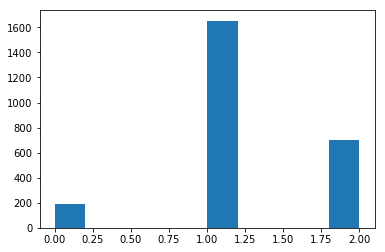

In [523]:
%matplotlib inline
plt.hist(Y_train)

In [524]:
#svс
X_train, X_test, Y_train, Y_test = train_test_split(weather, Y, test_size=0.33)
poly = PolynomialFeatures(degree=2)
svc = svm.SVC(kernel='rbf', C=0.7).fit(poly.fit_transform(X_train), Y_train)
#print(svc.score(poly.fit_transform(X_test),Y_test))
print(f1_score(svc.predict(poly.fit_transform(X_test)),Y_test , average='weighted'))
print(confusion_matrix(svc.predict(poly.fit_transform(X_test)),Y_test))

0.765455320348
[[  0   0   0]
 [ 96 793 302]
 [  0  15  47]]


/Users/Markos/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.



In [525]:
#gda
X_train, X_test, Y_train, Y_test = train_test_split(weather, Y, test_size=0.33)
poly = PolynomialFeatures(degree=2)
clf = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto').fit(poly.fit_transform(X_train), Y_train)
print(clf.score(poly.fit_transform(X_test),Y_test))
print(f1_score(clf.predict(poly.fit_transform(X_test)),Y_test , average='weighted'))
print(confusion_matrix(clf.predict(poly.fit_transform(X_test)),Y_test))

0.697525937749
0.737919341095
[[  8   4   2]
 [ 85 732 220]
 [  2  66 134]]


In [526]:
#neural
clf = MLPClassifier(hidden_layer_sizes=(5,3), activation='logistic', solver='sgd', alpha=0, learning_rate_init=0.015, power_t=0.5, max_iter=500, shuffle=True, random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
clf.fit(poly.fit_transform(X_train), Y_train) 
clf.score(poly.fit_transform(X_train), Y_train)
print(f1_score(clf.predict(poly.fit_transform(X_test)),Y_test , average='weighted'))
print(confusion_matrix(clf.predict(poly.fit_transform(X_test)),Y_test))

0.729292319656
[[  0   0   0]
 [ 92 727 233]
 [  3  75 123]]


/Users/Markos/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.



In [485]:
#time date
dft=df
dft['date'] = pd.to_datetime(dft.date)
dft = dft[['date', 'CH2O']]

aggr_dft = dft.groupby('date')[['CH2O']].mean()
aggr_dft.columns = ['CH2O_mean']

aggr_dft = aggr_dft.resample('D').apply(sum)

init_notebook_mode(connected = True)

In [387]:
#time visualisation
def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

plotly_df(aggr_dft.resample('W').apply(sum), title = 'CH2O')

/Users/Markos/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



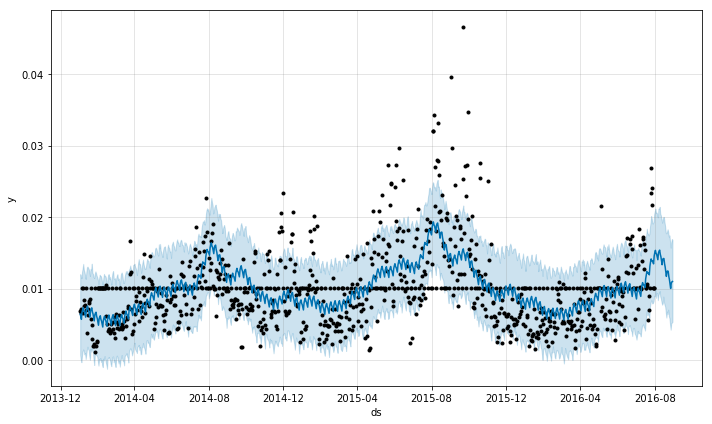

In [356]:
#prediction
predictions = 30
dft = aggr_dft.reset_index()
dft.columns = ['ds', 'y']
dft=dft.fillna(dft.y.mean())
train_df = dft[:-predictions] 
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)
m.plot(forecast)

/Users/Markos/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



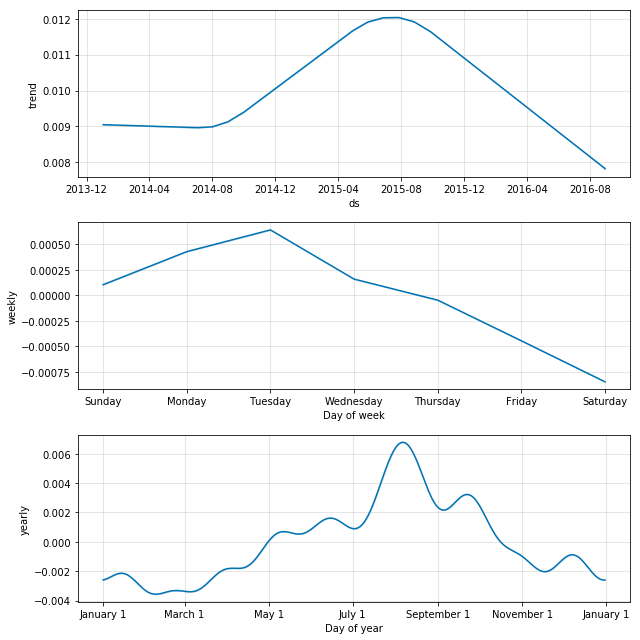

In [357]:
m.plot_components(forecast)

In [358]:
print(', '.join(forecast.columns))
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(dft.set_index('ds'))
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print ('MAPE', np.mean(abs(cmp_df[-predictions:]['p'])))
print ('MAE', np.mean(abs(cmp_df[-predictions:]['e'])))

ds, t, trend, seasonal_lower, seasonal_upper, trend_lower, trend_upper, yhat_lower, yhat_upper, weekly, weekly_lower, weekly_upper, yearly, yearly_lower, yearly_upper, seasonal, yhat
MAPE 34.046380969175765
MAE 0.004154162810771803


In [359]:
def show_forecast(cmp_df, num_predictions, num_values):
    upper_bound = go.Scatter(
        name='Upper Bound',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions).yhat_upper,
        mode='lines',
        marker=dict(color="444"),
        line=dict(width=0),
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty')

    forecast = go.Scatter(
        name='Prediction',
        x=cmp_df.tail(predictions).index,
        y=cmp_df.tail(predictions).yhat,
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    )

    lower_bound = go.Scatter(
        name='Lower Bound',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions).yhat_lower,
        marker=dict(color="444"),
        line=dict(width=0),
        mode='lines')

    fact = go.Scatter(
        name='Fact',
        x=cmp_df.tail(num_values).index,
        y=cmp_df.tail(num_values).y,
        marker=dict(color="red"),
        mode='lines',
    )

    data = [lower_bound, upper_bound, forecast, fact]

    layout = go.Layout(
        yaxis=dict(title='Формальдегід'),
        title='Вміст Формальдегіду',
        showlegend = False)

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

show_forecast(cmp_df, predictions, 200)

In [ ]:
s